In [1]:
from scipy import arange
from control import matlab, tf

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
B = 38.1*pow(10, -3)*60/(7910*2*np.pi)

Ka = 2
Kc2 = 2
Kc4 = 4
KA2 = Ka*Kc2
KA4 = Ka*Kc4
KM = 28.3*pow(10, -3)
Ra = 17.9
KV = 10*(360/350)/(2*np.pi)
K2 = KA2 * (KM/Ra) * (1/20) * KV
K4 = KA4 * (KM/Ra) * (1/20) * KV

J1 = 1.06*pow(10, -6)
J2 = np.pi*30*7930*(60**4)*pow(10, -15)*pow(0.5, 5)
J = J1 + pow(1/20, 2) * J2

In [5]:
print(KM/Ra)
print(J)
print(B)
print(KV)
print(K2)
print(K4)

0.001581005586592179
1.8167272034426247e-06
4.5995979760818296e-05
1.637022271802352
0.0005176282714190679
0.0010352565428381358


In [14]:
V2 = tf([K2], [J, B, K2])
V4 = tf([K4], [J, B, K4])
print(V2)
print(V4)
print(J)


              0.0005176
-------------------------------------
1.817e-06 s^2 + 4.6e-05 s + 0.0005176


              0.001035
------------------------------------
1.817e-06 s^2 + 4.6e-05 s + 0.001035

1.8167272034426247e-06


In [107]:
csv_file11 = pd.read_csv('/Users/ryotamarumoto/Classes/2022/機航実験2/制御-サーボ機構/図/ALL0001/F0001CH1.CSV', header=0, sep=',')
csv_file12 = pd.read_csv('/Users/ryotamarumoto/Classes/2022/機航実験2/制御-サーボ機構/図/ALL0001/F0001CH2.CSV', header=0, sep=',')

In [109]:
csv_file11.fillna(0)

,Record Length,2.50E+03,Unnamed: 2,time11,output11
0,Sample Interval,2.00E-04,0.0,-0.0500,2.04
1,Trigger Point,2.50E+02,0.0,-0.0498,2.04
2,0,0,0.0,-0.0496,2.06
3,0,0,0.0,-0.0494,2.04
4,0,0,0.0,-0.0492,2.04
...,...,...,...,...,...
2495,0,0,0.0,0.4490,4.10
2496,0,0,0.0,0.4492,4.10
2497,0,0,0.0,0.4494,4.08
2498,0,0,0.0,0.4496,4.08


In [110]:
csv_file12.fillna(0)

,Record Length,2.50E+03,Unnamed: 2,time12,output12
0,Sample Interval,2.00E-04,0.0,-0.0500,2.10
1,Trigger Point,2.50E+02,0.0,-0.0498,2.10
2,0,0,0.0,-0.0496,2.08
3,0,0,0.0,-0.0494,2.08
4,0,0,0.0,-0.0492,2.10
...,...,...,...,...,...
2495,0,0,0.0,0.4490,3.98
2496,0,0,0.0,0.4492,3.98
2497,0,0,0.0,0.4494,3.98
2498,0,0,0.0,0.4496,3.98


In [112]:
pd.DataFrame(csv_file11, columns=['time11', 'output11'])

,time11,output11
0,-0.0500,2.04
1,-0.0498,2.04
2,-0.0496,2.06
3,-0.0494,2.04
4,-0.0492,2.04
...,...,...
2495,0.4490,4.10
2496,0.4492,4.10
2497,0.4494,4.08
2498,0.4496,4.08


In [113]:
pd.DataFrame(csv_file12, columns=['time12', 'output12'])

,time12,output12
0,-0.0500,2.10
1,-0.0498,2.10
2,-0.0496,2.08
3,-0.0494,2.08
4,-0.0492,2.10
...,...,...
2495,0.4490,3.98
2496,0.4492,3.98
2497,0.4494,3.98
2498,0.4496,3.98


In [114]:
t_11 = csv_file11['time11']
y_11 = csv_file11['output11']
t_12 = csv_file12['time12']
y_12 = csv_file12['output12']

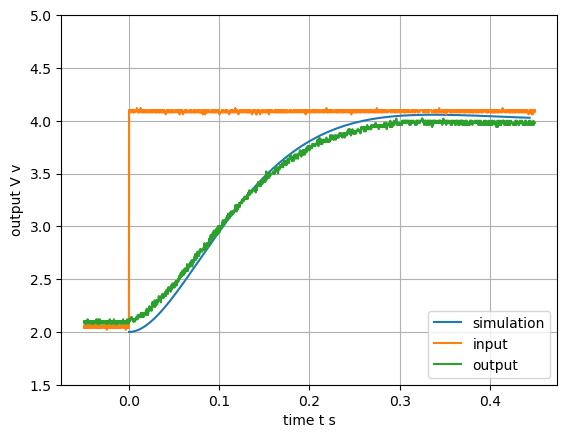

In [206]:
t = np.linspace(0, 0.37, 1000)
(output2, t) = matlab.step(V2, t)

plt.plot(t*1.2, output2*2+2)
plt.plot(t_11, y_11)
plt.plot(t_12, y_12)
plt.ylim([1.5, 5])
plt.xlabel('time t s')
plt.ylabel('output V v')
plt.legend(('simulation', 'input', 'output'), loc='lower right')
plt.grid()

In [117]:
csv_file21 = pd.read_csv('/Users/ryotamarumoto/Classes/2022/機航実験2/制御-サーボ機構/図/ALL0002/F0002CH1.CSV', header=0, sep=',')
csv_file22 = pd.read_csv('/Users/ryotamarumoto/Classes/2022/機航実験2/制御-サーボ機構/図/ALL0002/F0002CH2.CSV', header=0, sep=',')

In [118]:
pd.DataFrame(csv_file21, columns=['time21', 'output21'])

,time21,output21
0,-0.0500,2.06
1,-0.0498,2.06
2,-0.0496,2.04
3,-0.0494,2.06
4,-0.0492,2.04
...,...,...
2495,0.4490,4.10
2496,0.4492,4.10
2497,0.4494,4.10
2498,0.4496,4.08


In [119]:
pd.DataFrame(csv_file22, columns=['time22', 'output22'])

,time22,output22
0,-0.0500,2.10
1,-0.0498,2.10
2,-0.0496,2.10
3,-0.0494,2.10
4,-0.0492,2.10
...,...,...
2495,0.4490,4.14
2496,0.4492,4.14
2497,0.4494,4.14
2498,0.4496,4.16


In [122]:
t_21 = csv_file21['time21']
y_21 = csv_file21['output21']
t_22 = csv_file22['time22']
y_22 = csv_file22['output22']

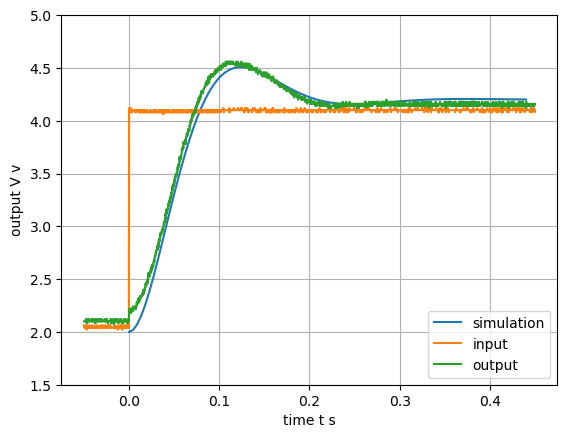

In [205]:
t = np.linspace(0, 0.55, 100)
(output4, t) = matlab.step(V4, t)
plt.plot(t*0.8, output4*2.2+2)
plt.plot(t_21, y_21)
plt.plot(t_22, y_22)
plt.ylim([1.5, 5])
plt.xlabel('time t s')
plt.ylabel('output V v')
plt.legend(('simulation', 'input', 'output'), loc='lower right')
plt.grid()